In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

from datetime import datetime
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
df.shape

(569, 32)

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.columns = ['ID number', 'Diagnosis','mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [7]:
df.head()

,ID number,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
df.Diagnosis.value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

In [5]:
Diagnosis_mapping = {'M':1, 'B':0}
df.Diagnosis = df.Diagnosis.map(Diagnosis_mapping)

In [35]:
df.tail()

,ID number,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [6]:
X = df.iloc[:, 2:]
Y = df.iloc[:, 1]


In [46]:
X.shape

(569, 30)

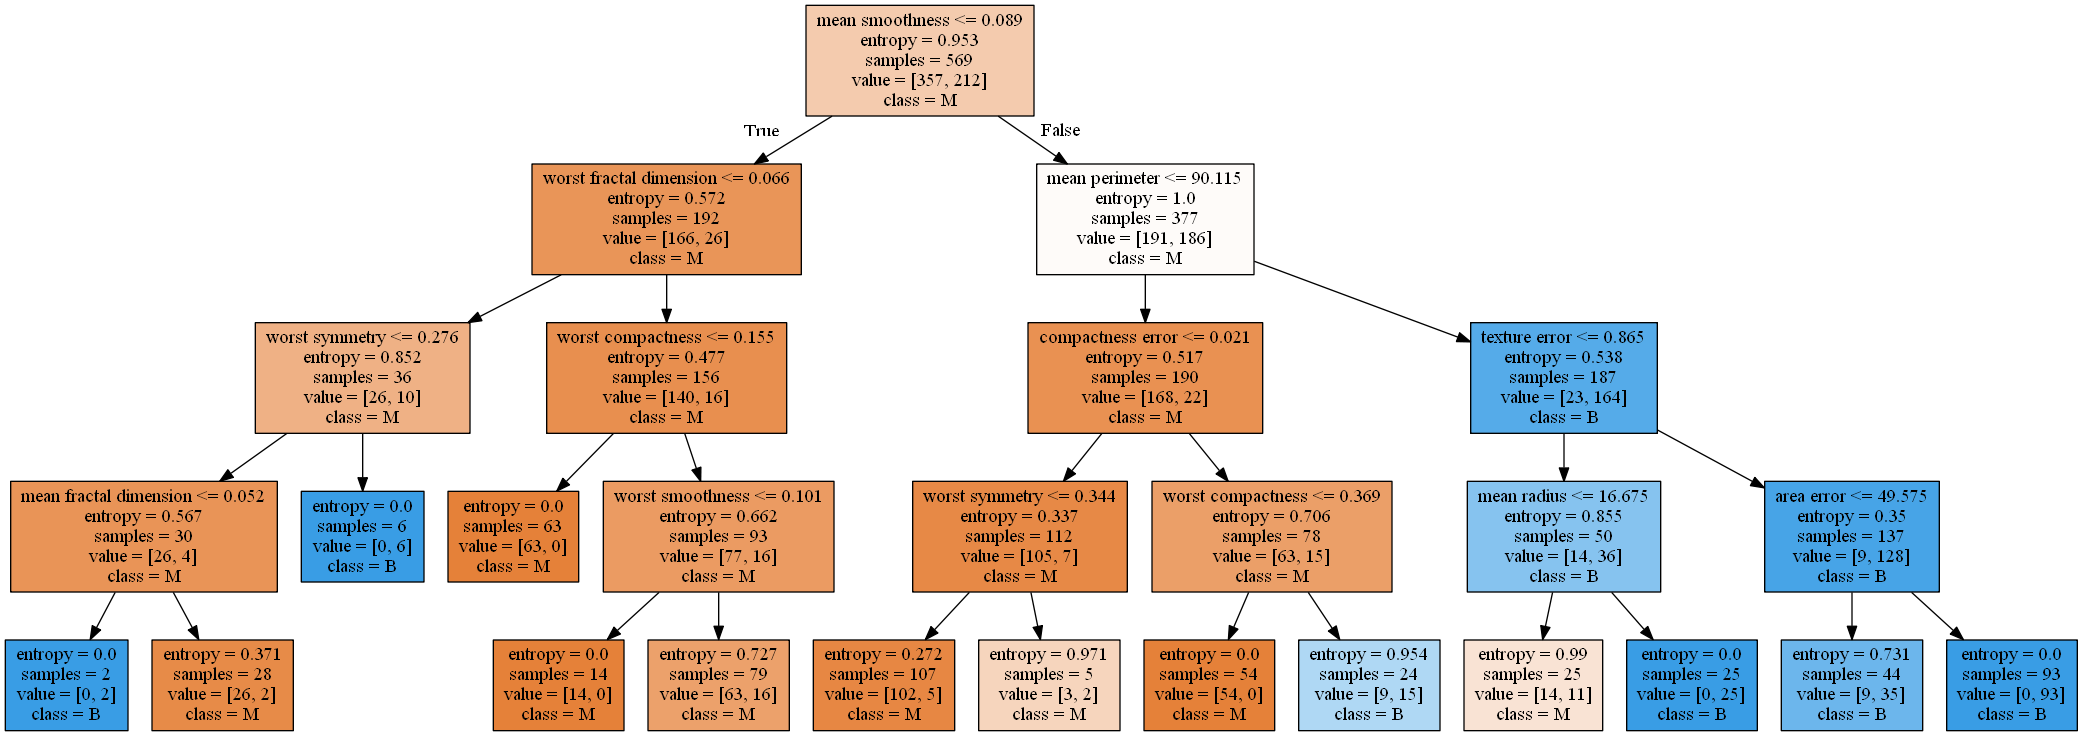

In [57]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['M', 'B'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



In [30]:
start_time = datetime.now()
dt_score = cross_val_score(decision_tree, X, Y, cv=10)
print(dt_score)
print('Accuracy: %.2f +/- %.2f' % (dt_score.mean(), dt_score.std()))
print("Duration : ", (datetime.now() - start_time))

[ 0.86206897  0.81034483  0.87719298  0.84210526  0.77192982  0.9122807
  0.87719298  0.875       0.875       0.92857143]
Accuracy: 0.86 +/- 0.09
Duration :  0:00:00.043057


In [10]:
from sklearn.grid_search import GridSearchCV
start_time = datetime.now()
gs = GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [3, 4, 5, 6, 7, None]                              
                              }],
                  scoring='accuracy',
                  cv=10)
scores = cross_val_score(gs,X,Y,scoring='accuracy',cv=10)
print('CV Gridsearch Accuracy: %.2f +/- %.2f' % (scores.mean(), scores.std()))
print("Duration : ", (datetime.now() - start_time))

CV Gridsearch Accuracy: 0.91 +/- 0.03
Duration :  0:00:04.437587


In [18]:
from sklearn.grid_search import GridSearchCV
start_time = datetime.now()
params = {'max_depth': [3, 4, 5, 6, 7, None],
          'max_features':[1,2,3,4]
         }
gs = GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=0),
                  param_grid=params,
                  scoring='accuracy',
                  cv=10)
#scores = cross_val_score(gs,X,Y,scoring='accuracy',cv=10)
gs = gs.fit(X, Y)

print("Duration : ", (datetime.now() - start_time))
print()

print(gs.best_score_)
print(gs.best_params_)

CV Gridsearch Accuracy: 0.92 +/- 0.03
Duration :  0:00:00.578148

[ 0.89655172  0.87931034  0.92982456  0.92982456  0.96491228  0.92982456
  0.87719298  0.94642857  0.89285714  0.94642857]
0.9437609841827768
{'max_depth': 6, 'max_features': 2}


In [26]:
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
pipeline = Pipeline([('scl', StandardScaler()),('clf', tree.DecisionTreeClassifier(random_state=0))])
params = {'clf__max_depth': (3, 4, 5, 6, 7, None),
          'clf__max_features':(1,2,3,4,5,None)
         }
gs = GridSearchCV(estimator=pipeline,
                  param_grid=params,
                  scoring='accuracy',
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
   

0.9406593406593406
{'clf__max_depth': 5, 'clf__max_features': None}


In [28]:
scores = cross_val_score(gs, X, Y, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.931 +/- 0.052


In [40]:
from sklearn.model_selection import KFold
accuracy = []

test_no = 1
kf = KFold(n_splits=10, shuffle = True) 
for train_index, test_index in kf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    predicted = gs.fit(X_train, Y_train).predict(X_test)
    actual = Y_test
    accur = 1 - (actual!=predicted).sum()/len(actual)
    print('Fold {} Accuracy {}'.format(test_no, accur))
    
    accuracy.append(1 - (actual!=predicted).sum()/len(actual))
    test_no = test_no + 1
print('Average Accuracy ',np.mean(accuracy))

Fold 1 Accuracy 0.9473684210526316
Fold 2 Accuracy 0.9122807017543859
Fold 3 Accuracy 0.9122807017543859
Fold 4 Accuracy 0.9122807017543859
Fold 5 Accuracy 0.9824561403508771
Fold 6 Accuracy 0.8947368421052632
Fold 7 Accuracy 0.9649122807017544
Fold 8 Accuracy 0.9298245614035088
Fold 9 Accuracy 0.9298245614035088
Fold 10 Accuracy 0.9464285714285714

 Average Accuracy 0.933239348371


In [31]:
forest = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=1)
start_time = datetime.now()
dt_score = cross_val_score(forest, X, Y, cv=10)
print(dt_score)
print('Accuracy: %.2f +/- %.2f' % (dt_score.mean(), dt_score.std()))
print("Duration : ", (datetime.now() - start_time))

[ 0.98275862  0.89655172  0.92982456  0.96491228  0.98245614  0.98245614
  0.98245614  0.98214286  0.94642857  0.98214286]
Accuracy: 0.96 +/- 0.06
Duration :  0:00:02.679141


In [61]:
X.shape

(569, 30)

In [62]:
print('Decision Tree')
df = pd.DataFrame()
df['imp']= decision_tree.fit(X, Y).feature_importances_
df['features'] = X.columns
sorted_features = df.sort_values(by='imp', ascending=False)
print('Selecting only the top 10 features based on feature importance \n')
top_10_features = np.asarray(sorted_features['features'].iloc[:20])
x2 =X[top_10_features]
start_time = datetime.now()
score = cross_val_score(decision_tree, x2, Y, cv=10)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print(score)

print('Accuracy: %.2f +/- %.2f' % (score.mean(), 2*score.std()))


Decision Tree
Selecting only the top 10 features based on feature importance 

Duration: 0:00:00.031255
[ 0.9137931   0.84482759  0.87719298  0.9122807   0.87719298  0.92982456
  0.87719298  1.          0.89285714  0.875     ]
Accuracy: 0.90 +/- 0.08


In [63]:
print('Random Forest')
forest = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=1)
df = pd.DataFrame()
df['imp']= forest.fit(X, Y).feature_importances_
df['features'] = X.columns
sorted_features = df.sort_values(by='imp', ascending=False)
print('Selecting only the top 10 features based on feature importance \n')
top_10_features = np.asarray(sorted_features['features'].iloc[:20])
x2 =X[top_10_features]
start_time = datetime.now()
score = cross_val_score(forest, x2, Y, cv=10)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print(score)
print(score.mean())

Random Forest
Selecting only the top 10 features based on feature importance 

Duration: 0:00:01.871858
[ 0.98275862  0.93103448  0.94736842  0.94736842  1.          0.98245614
  0.96491228  0.98214286  0.94642857  0.98214286]
0.966661265232


# RFE

In [65]:
print('Decision Tree ')
X_std = StandardScaler().fit_transform(X)
rfe = RFE(decision_tree, n_features_to_select=20)
X_rfe = rfe.fit_transform(X_std,Y)

score = cross_val_score(decision_tree, X_rfe, Y, cv=10)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print(score)
print(score.mean())

Decision Tree 
Duration: 0:01:03.098267
[ 0.93103448  0.86206897  0.89473684  0.94736842  0.9122807   0.9122807
  0.85964912  0.92857143  0.92857143  0.875     ]
0.905156209489


In [66]:
print('Random Forest ')
X_std = StandardScaler().fit_transform(X)
rfe = RFE(forest, n_features_to_select=10)
X_rfe = rfe.fit_transform(X_std,Y)
score = cross_val_score(forest, X_rfe, Y, cv=10)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print(score)
print(score.mean())

Random Forest 
Duration: 0:01:11.784876
[ 0.98275862  0.9137931   0.92982456  0.96491228  1.          0.98245614
  0.96491228  0.98214286  0.94642857  0.98214286]
0.964937127301


The Random Forest classifier performs better without much parameter tuning. The accuracy achieved by decision tree after parameter tuning is little less than random forest.